In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import os

In [417]:
# Função para padronizar os nomes
def padronizar_nome(nome):
    # Remover acentos e caracteres especiais
    nome = unicodedata.normalize('NFKD', nome).encode('ascii', 'ignore').decode('utf-8')
    # Converter para letras maiúsculas
    nome = nome.upper()
    # Remover espaços extras
    nome = nome.strip()
    return nome


import unicodedata

# Function to normalize municipality names
def normalize_names(series):
    return (
        series.str.normalize('NFKD')  # Normalize accents
        .str.encode('ascii', errors='ignore').str.decode('utf-8')  # Remove non-ASCII characters
        .str.strip()  # Remove leading/trailing spaces
        .str.upper()  # Convert to uppercase
    )

# Leitura dos arquivos

In [418]:
# Leitura dos dados de Censo do IBGE de 2022

df_censo = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/censo.csv', header=0, sep=';')
df_censo.info()
df_censo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_REGIAO      5570 non-null   int64 
 1   NM_REGIAO      5570 non-null   object
 2   CD_UF          5570 non-null   int64 
 3   NM_UF          5570 non-null   object
 4   CD_MUN         5570 non-null   int64 
 5   NM_MUN         5570 non-null   object
 6   Total_setores  5570 non-null   int64 
 7   v0001          5570 non-null   int64 
 8   v0002          5570 non-null   int64 
 9   v0003          5570 non-null   int64 
 10  v0004          5570 non-null   int64 
 11  v0005          5570 non-null   object
 12  v0006          5195 non-null   object
 13  v0007          5570 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 609.3+ KB


,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,Total_setores,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,73,21494,10081,10062,19,"2,785686453","2,948434862",7699
1,1,Norte,11,Rondônia,1100023,Ariquemes,151,96833,44157,44114,43,"2,765064397","4,381324747",34784
2,1,Norte,11,Rondônia,1100031,Cabixi,15,5351,2927,2921,6,"2,720386375","4,931367565",1967
3,1,Norte,11,Rondônia,1100049,Cacoal,154,86887,40930,40905,25,"2,709561241","2,571169083",31931
4,1,Norte,11,Rondônia,1100056,Cerejeiras,31,15890,7069,7064,5,"2,689754935","3,931245745",5876


In [419]:
## Leitura do dicionário de dados

df_dicionario = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/dicionario_censo_1.csv')
df_dicionario.head(5)

,VARIÁVEL,TIPO,TAMANHO,DESCRIÇÃO
0,CD_SETOR,texto,16.0,Geocódigo de Setor Censitário
1,AREA_KM2,real,NaN,Área do Setor Censitário em quilômetros quadrados
2,CD_REGIAO,numérico,1.0,Código das Grandes Regiões (Regiões Geográficas)
3,NM_REGIAO,texto,15.0,Nome das Grandes Regiões (Regiões Geográficas)
4,CD_UF,numérico,2.0,Código da Unidade da Federação


In [420]:
# Leitura dos dados de IDH 2010

df_idh = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/idh.csv',header=0, sep=';')
df_idh.info()
df_idh.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  188 non-null    object
 1   IDHM 2010          186 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


,Territorialidades,IDHM 2010
0,Brasil,"0,727"
1,Abaiara (CE),"0,628"
2,Acarape (CE),"0,606"
3,Acaraú (CE),"0,601"
4,Acopiara (CE),"0,595"


In [421]:
# Leitura dos dados de votação 2022

df_votos = pd.read_csv('./dados/votos.csv', encoding='latin1', header=0, sep=';')
df_votos.info()
df_votos.head(5)
# df_votos['NM_MUNICIPIO'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509903 entries, 0 to 2509902
Data columns (total 26 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  NR_SECAO                   int64 
 17  CD_CARGO                   int64 
 18  DS_CARGO                   object
 19  NR_VOTAVEL                 int64 
 20  NM_VOTAVEL              

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,6,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4,1023,60001608890,CENTRO COMUNITARIO CONJUNTO SAO FRANCISCO,RUA ILHA DO BOTE 367
1,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,266,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13,1546,60001608890,ESCOLA MUNICIPAL ZINA MOREIRA,TIMBAUBA NOSSA SENHORA DAS DORES
2,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,119,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3,1058,60001608890,EEM ENGENHEIRO AGEU ROMERO,RUA EVARISTO GOMES 143
3,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,25,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,2,1082,60001608890,EEFM CORONEL MURILO SERPA,RUA ANASTACIO BARROSO VALENTE 318
4,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,228,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4,1058,60001608890,E.E.F. MARIA LINDA DA GLÓRIA,DISTRITO FLAMENGO


In [422]:
# Leitura dos dados dos candidatos de 2022

df_info_candidatos = pd.read_csv('./dados/info_candidatos.csv', encoding='latin1', header=0, sep=';')
df_info_candidatos.info()
df_info_candidatos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     1018 non-null   object
 1   HH_GERACAO                     1018 non-null   object
 2   ANO_ELEICAO                    1018 non-null   int64 
 3   CD_TIPO_ELEICAO                1018 non-null   int64 
 4   NM_TIPO_ELEICAO                1018 non-null   object
 5   NR_TURNO                       1018 non-null   int64 
 6   CD_ELEICAO                     1018 non-null   int64 
 7   DS_ELEICAO                     1018 non-null   object
 8   DT_ELEICAO                     1018 non-null   object
 9   TP_ABRANGENCIA                 1018 non-null   object
 10  SG_UF                          1018 non-null   object
 11  SG_UE                          1018 non-null   object
 12  NM_UE                          1018 non-null   object
 13  CD_

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,16/12/2024,03:36:26,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,702,OPERADOR DE APARELHOS DE PRODUÇÃO INDUSTRIAL,5,SUPLENTE
1,16/12/2024,03:36:26,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,2,LÊ E ESCREVE,3,CASADO(A),1,BRANCA,709,TRABALHADOR DE CONSTRUÇÃO CIVIL,4,NÃO ELEITO
2,16/12/2024,03:36:26,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,5,SUPLENTE
3,16/12/2024,03:36:26,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,4,NÃO ELEITO
4,16/12/2024,03:36:26,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,7,SUPERIOR INCOMPLETO,9,DIVORCIADO(A),1,BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),5,SUPLENTE


In [423]:
# Leitura dos dados de furtos 2009 a 2023

df_furtos = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/furtos.csv', header=0, sep=',')
df_furtos.info()
df_furtos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798101 entries, 0 to 798100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AIS            798101 non-null  object
 1   Município      798101 non-null  object
 2   Dia da Semana  798101 non-null  object
 3   Data           798101 non-null  object
 4   Hora           798101 non-null  object
dtypes: object(5)
memory usage: 30.4+ MB


,AIS,Município,Dia da Semana,Data,Hora
0,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
1,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
2,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
3,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM
4,AIS 05,Fortaleza,Quinta,1-Jan-09,12:00:00 AM


In [424]:
df_mapas_uf = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/mapas_uf.csv', header=0, sep=',')
df_mapas_uf.info()
df_mapas_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_uf      27 non-null     int64 
 1   sigla_uf   27 non-null     object
 2   geometria  27 non-null     object
dtypes: int64(1), object(2)
memory usage: 776.0+ bytes


,id_uf,sigla_uf,geometria
0,13,AM,"POLYGON((-67.3305623597076 2.06126594616903, -..."
1,17,TO,"POLYGON((-48.3681565220881 -5.16857194577177, ..."
2,26,PE,MULTIPOLYGON(((-32.3988144901827 -3.8289620220...
3,51,MT,"POLYGON((-54.891531198086 -17.6213747173965, -..."
4,15,PA,MULTIPOLYGON(((-46.465471985428 -0.95986049519...


In [425]:
df_mapas_municipio = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/mapas_municipio.csv', header=0, sep=',')
df_mapas_municipio.info()
df_mapas_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_municipio  5570 non-null   int64 
 1   sigla_uf      5570 non-null   object
 2   geometria     5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


,id_municipio,sigla_uf,geometria
0,1200336,AC,"POLYGON((-73.801558115 -7.111824379, -73.79209..."
1,1200385,AC,"POLYGON((-67.124663651 -9.969853, -67.16561695..."
2,1200328,AC,"POLYGON((-71.566051804 -8.648094841, -71.57330..."
3,1200203,AC,"POLYGON((-72.900313047 -7.437681232, -72.88910..."
4,1200104,AC,"POLYGON((-69.131563493 -10.385028002, -69.1493..."


In [426]:
df_diretorios_uf = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/diretorios_uf.csv', header=0, sep=',')
df_diretorios_uf.info()
df_diretorios_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_uf   27 non-null     int64 
 1   sigla   27 non-null     object
 2   nome    27 non-null     object
 3   regiao  27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


,id_uf,sigla,nome,regiao
0,42,SC,Santa Catarina,Sul
1,41,PR,Paraná,Sul
2,43,RS,Rio Grande do Sul,Sul
3,11,RO,Rondônia,Norte
4,13,AM,Amazonas,Norte


In [427]:
df_diretorios_municipio = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/diretorios_municipio.csv', header=0, sep=',')
df_diretorios_municipio.info()
df_diretorios_municipio.head(5)
df_diretorios_municipio['nome']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               5570 non-null   int64 
 1   id_municipio_6             5570 non-null   int64 
 2   id_municipio_tse           5570 non-null   int64 
 3   id_municipio_rf            5570 non-null   int64 
 4   id_municipio_bcb           5570 non-null   int64 
 5   nome                       5570 non-null   object
 6   capital_uf                 5570 non-null   int64 
 7   id_comarca                 5570 non-null   int64 
 8   id_regiao_saude            5570 non-null   int64 
 9   nome_regiao_saude          5570 non-null   object
 10  id_regiao_imediata         5570 non-null   int64 
 11  nome_regiao_imediata       5570 non-null   object
 12  id_regiao_intermediaria    5570 non-null   int64 
 13  nome_regiao_intermediaria  5570 non-null   object
 14  id_micro

,nome
0,Nova Mamoré
1,Porto Velho
2,Itapuã do Oeste
3,Candeias do Jamari
4,Cujubim
...,...
5565,Gouvelândia
5566,Paranaiguara
5567,Quirinópolis
5568,São Simão


# Tratamento dos dados

In [428]:
# Aplicar a função nas colunas de nome de município de ambas as tabelas
df_votos['NM_MUNICIPIO'] = df_votos['NM_MUNICIPIO'].apply(padronizar_nome)
df_diretorios_municipio['nome'] = df_diretorios_municipio['nome'].apply(padronizar_nome)

# Verificar a padronização
print(df_votos['NM_MUNICIPIO'].unique())
print(df_diretorios_municipio['nome'].unique())

# df_diretorios_municipio.info()

['FORTALEZA' 'RUSSAS' 'PARAIPABA' 'ITAPIPOCA' 'SABOEIRO' 'PACAJUS' 'TAUA'
 'GRANJA' 'BARREIRA' 'BATURITE' 'IGUATU' 'COREAU' 'MARACANAU' 'QUIXELO'
 'CAUCAIA' 'JUAZEIRO DO NORTE' 'MARANGUAPE' 'UBAJARA' 'CHOROZINHO'
 'BREJO SANTO' 'SOBRAL' 'BARBALHA' 'BOA VIAGEM' 'TURURU'
 'JIJOCA DE JERICOACOARA' 'PEDRA BRANCA' 'OCARA' 'IRAUCUBA' 'FORTIM'
 'PACATUBA' 'QUIXADA' 'MOMBACA' 'ACOPIARA' 'MASSAPE' 'CATUNDA' 'ARACATI'
 'ITAREMA' 'HORIZONTE' 'PENTECOSTE' 'TIANGUA' 'PARACURU'
 'SAO LUIS DO CURU' 'BANABUIU' 'ACARAU' 'QUIXERAMOBIM' 'QUIXERE' 'CRUZ'
 'JAGUARETAMA' 'CAPISTRANO' 'UMIRIM' 'ITAPAJE' 'MULUNGU'
 'LAVRAS DA MANGABEIRA' 'VARZEA ALEGRE' 'ITAPIUNA' 'NOVA RUSSAS' 'AQUIRAZ'
 'ANTONINA DO NORTE' 'CHAVAL' 'CAMOCIM' 'MORADA NOVA' 'MAURITI' 'CASCAVEL'
 'CRATEUS' 'JAGUARIBE' 'CARIRIACU' 'IBICUITINGA' 'BEBERIBE' 'TRAIRI'
 'CARIDADE' 'CANINDE' 'PARAMOTI' 'URUBURETAMA' 'SAO GONCALO DO AMARANTE'
 'ARACOIABA' 'PIRES FERREIRA' 'EUSEBIO' 'MUCAMBO' 'FARIAS BRITO'
 'MISSAO VELHA' 'CROATA' 'CEDRO' 'QUITERIANOP

### Idh

- divisão da coluna `Territorialidades` em `Estado` e `Cidade`
- renomeação das colunas

In [429]:
import numpy as np

df_idh['estado'] = df_idh['Territorialidades'].str.split('(').str[1].str.split(')').str[0]
df_idh['cidade'] = df_idh['Territorialidades'].str.split('(').str[0]

df_idh.rename(columns={'IDHM 2010': 'idh', 'Territorialidades': 'territorialidades'}, inplace=True)
df_idh['idh'] = df_idh['idh'].str.replace(',', '.').replace(' ', np.nan).astype(float)

df_idh['nome_municipio'] = df_idh['cidade'].str.strip()
df_idh['estado'] = df_idh['estado'].str.strip()

df_idh.head(5)

,territorialidades,idh,estado,cidade,nome_municipio
0,Brasil,0.727,NaN,Brasil,Brasil
1,Abaiara (CE),0.628,CE,Abaiara,Abaiara
2,Acarape (CE),0.606,CE,Acarape,Acarape
3,Acaraú (CE),0.601,CE,Acaraú,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara,Acopiara


### Censo

- renomeação das colunas

In [430]:
# Criar um dicionário de mapeamento a partir do df_dicionario
mapping = {
    'CD_REGIAO': 'id_regiao',
    'NM_REGIAO': 'nome_regiao',
    'CD_UF': 'id_uf',
    'NM_UF': 'nome_uf',
    'CD_MUN': 'id_municipio',
    'NM_MUN': 'nome_municipio',
    'Total_setores': 'total_setores',
    'v0001': 'total_pessoas',
    'v0002': 'total_domicilios',
    'v0003': 'total_domicilios_particulares',
    'v0004': 'total_domicilios_coletivos',
    'v0005': 'media_moradores_domicilio_particular_ocupado',
    'v0006': 'percentual_domicilios_particulares_ocupados',
    'v0007': 'total_domicilios_particulares_ocupados',
}

# Renomear as colunas do df_censo
df_censo = df_censo.rename(columns=mapping)
df_censo.head(5)

,id_regiao,nome_regiao,id_uf,nome_uf,id_municipio,nome_municipio,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,media_moradores_domicilio_particular_ocupado,percentual_domicilios_particulares_ocupados,total_domicilios_particulares_ocupados
0,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,73,21494,10081,10062,19,"2,785686453","2,948434862",7699
1,1,Norte,11,Rondônia,1100023,Ariquemes,151,96833,44157,44114,43,"2,765064397","4,381324747",34784
2,1,Norte,11,Rondônia,1100031,Cabixi,15,5351,2927,2921,6,"2,720386375","4,931367565",1967
3,1,Norte,11,Rondônia,1100049,Cacoal,154,86887,40930,40905,25,"2,709561241","2,571169083",31931
4,1,Norte,11,Rondônia,1100056,Cerejeiras,31,15890,7069,7064,5,"2,689754935","3,931245745",5876


### Votos

- renomeação das colunas

In [431]:
df_votos.rename(columns={
    'CD_MUNICIPIO': 'codigo_municipio',
    'NM_MUNICIPIO': 'nome_municipio',
    'NM_VOTAVEL': 'nome_candidato',
    'QT_VOTOS': 'total_votos'
}, inplace=True)

### Informações dos candidatos

- renomeação de colunas

In [432]:
df_info_candidatos.rename(columns={
    'NM_CANDIDATO': 'nome_candidato',
    'SG_PARTIDO': 'sigla_partido',
    'NM_PARTIDO': 'nome_partido',
}, inplace=True)


### Furtos

- mudança do tipo de dado da coluna `Data` para `datetime`
- criação da coluna `Ano` a partir da coluna `Data`
- renomeação das colunas

In [433]:
df_furtos['Data'] = df_furtos['Data'] = pd.to_datetime(df_furtos['Data'], format='%d-%b-%y', dayfirst=True)
df_furtos['ano'] = df_furtos['Data'].dt.year

df_furtos.rename(columns={
    'Município': 'nome_municipio',
    'Dia da Semana': 'dia_semana',
    'Data': 'data',
    'Hora': 'hora'
}, inplace=True)

### UFs

In [434]:
df_mapas_uf.rename(columns={
    'sigla_uf': 'SG_UF',
}, inplace=True)

df_mapas_uf.head(5)

,id_uf,SG_UF,geometria
0,13,AM,"POLYGON((-67.3305623597076 2.06126594616903, -..."
1,17,TO,"POLYGON((-48.3681565220881 -5.16857194577177, ..."
2,26,PE,MULTIPOLYGON(((-32.3988144901827 -3.8289620220...
3,51,MT,"POLYGON((-54.891531198086 -17.6213747173965, -..."
4,15,PA,MULTIPOLYGON(((-46.465471985428 -0.95986049519...


### Municípios

In [435]:
df_mapas_municipio.rename(columns={
    'sigla_uf': 'SG_UF',
}, inplace=True)

df_mapas_municipio.head(5)

,id_municipio,SG_UF,geometria
0,1200336,AC,"POLYGON((-73.801558115 -7.111824379, -73.79209..."
1,1200385,AC,"POLYGON((-67.124663651 -9.969853, -67.16561695..."
2,1200328,AC,"POLYGON((-71.566051804 -8.648094841, -71.57330..."
3,1200203,AC,"POLYGON((-72.900313047 -7.437681232, -72.88910..."
4,1200104,AC,"POLYGON((-69.131563493 -10.385028002, -69.1493..."


### Diretórios UF

In [436]:
df_diretorios_uf.rename(columns={
    'sigla': 'SG_UF',
}, inplace=True)

df_diretorios_uf.head(5)

,id_uf,SG_UF,nome,regiao
0,42,SC,Santa Catarina,Sul
1,41,PR,Paraná,Sul
2,43,RS,Rio Grande do Sul,Sul
3,11,RO,Rondônia,Norte
4,13,AM,Amazonas,Norte


### Diretórios Município

In [437]:
df_diretorios_municipio.rename(columns={
    'nome': 'nome_municipio',
    'sigla_uf': 'SG_UF'
}, inplace=True)

df_diretorios_municipio.head(5)

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome_municipio,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,SG_UF,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100338,110033,434,47,44516,NOVA MAMORE,0,1100106,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
1,1100205,110020,35,3,30719,PORTO VELHO,1,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
2,1101104,110110,493,683,46851,ITAPUA DO OESTE,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
3,1100809,110080,477,681,46961,CANDEIAS DO JAMARI,0,1100205,11004,Madeira-Mamoré,...,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
4,1100940,110094,680,8,56652,CUJUBIM,0,1100023,11001,Vale do Jamari,...,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


# Filtro de dados

### Votos

- filtrar dados de votos para Deputados Federais

In [438]:
df_votos = df_votos[df_votos['DS_CARGO']=='DEPUTADO FEDERAL'].reset_index(drop=True)
df_votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   DT_GERACAO                 1056847 non-null  object
 1   HH_GERACAO                 1056847 non-null  object
 2   ANO_ELEICAO                1056847 non-null  int64 
 3   CD_TIPO_ELEICAO            1056847 non-null  int64 
 4   NM_TIPO_ELEICAO            1056847 non-null  object
 5   NR_TURNO                   1056847 non-null  int64 
 6   CD_ELEICAO                 1056847 non-null  int64 
 7   DS_ELEICAO                 1056847 non-null  object
 8   DT_ELEICAO                 1056847 non-null  object
 9   TP_ABRANGENCIA             1056847 non-null  object
 10  SG_UF                      1056847 non-null  object
 11  SG_UE                      1056847 non-null  object
 12  NM_UE                      1056847 non-null  object
 13  codigo_municipio           

### Informações dos candidatos

- filtrar dados de votos para Deputados Federais

In [439]:
df_info_candidatos = df_info_candidatos[df_info_candidatos['DS_CARGO']=='DEPUTADO FEDERAL'].reset_index(drop=True)
df_info_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     414 non-null    object
 1   HH_GERACAO                     414 non-null    object
 2   ANO_ELEICAO                    414 non-null    int64 
 3   CD_TIPO_ELEICAO                414 non-null    int64 
 4   NM_TIPO_ELEICAO                414 non-null    object
 5   NR_TURNO                       414 non-null    int64 
 6   CD_ELEICAO                     414 non-null    int64 
 7   DS_ELEICAO                     414 non-null    object
 8   DT_ELEICAO                     414 non-null    object
 9   TP_ABRANGENCIA                 414 non-null    object
 10  SG_UF                          414 non-null    object
 11  SG_UE                          414 non-null    object
 12  NM_UE                          414 non-null    object
 13  CD_CA

### Censo

- filtrar dados de censo para o Estado de Ceará

In [440]:
df_censo = df_censo[df_censo['nome_uf'] == 'Ceará'].reset_index(drop=True)
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id_regiao                                     184 non-null    int64 
 1   nome_regiao                                   184 non-null    object
 2   id_uf                                         184 non-null    int64 
 3   nome_uf                                       184 non-null    object
 4   id_municipio                                  184 non-null    int64 
 5   nome_municipio                                184 non-null    object
 6   total_setores                                 184 non-null    int64 
 7   total_pessoas                                 184 non-null    int64 
 8   total_domicilios                              184 non-null    int64 
 9   total_domicilios_particulares                 184 non-null    int64 
 10  to

### Mapas

In [441]:
df_mapas_uf = df_mapas_uf[df_mapas_uf['SG_UF'] == 'CE'].reset_index(drop=True)
df_mapas_uf.info()
df_mapas_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_uf      1 non-null      int64 
 1   SG_UF      1 non-null      object
 2   geometria  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


,id_uf,SG_UF,geometria
0,23,CE,"POLYGON((-41.1775766682825 -4.46769665097272, ..."


In [442]:
df_mapas_municipio = df_mapas_municipio[df_mapas_municipio['SG_UF'] == 'CE'].reset_index(drop=True)
df_mapas_municipio.info()
df_mapas_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_municipio  184 non-null    int64 
 1   SG_UF         184 non-null    object
 2   geometria     184 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


,id_municipio,SG_UF,geometria
0,2302503,CE,"POLYGON((-38.940520466 -7.427975185, -39.07819..."
1,2304657,CE,"POLYGON((-40.76147804 -3.95063271500001, -40.7..."
2,2306108,CE,"POLYGON((-39.784873661 -3.631059518, -39.78686..."
3,2311355,CE,"POLYGON((-39.018526315 -6.00522936199999, -39...."
4,2303006,CE,"POLYGON((-38.984159556 -4.044386322, -39.00354..."


In [443]:
df_diretorios_uf = df_diretorios_uf[df_diretorios_uf['SG_UF'] == 'CE'].reset_index(drop=True)
df_diretorios_uf.info()
df_diretorios_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_uf   1 non-null      int64 
 1   SG_UF   1 non-null      object
 2   nome    1 non-null      object
 3   regiao  1 non-null      object
dtypes: int64(1), object(3)
memory usage: 160.0+ bytes


,id_uf,SG_UF,nome,regiao
0,23,CE,Ceará,Nordeste


In [444]:
df_diretorios_municipio = df_diretorios_municipio[df_diretorios_municipio['SG_UF'] == 'CE'].reset_index(drop=True)
df_diretorios_municipio.info()
df_diretorios_municipio.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               184 non-null    int64 
 1   id_municipio_6             184 non-null    int64 
 2   id_municipio_tse           184 non-null    int64 
 3   id_municipio_rf            184 non-null    int64 
 4   id_municipio_bcb           184 non-null    int64 
 5   nome_municipio             184 non-null    object
 6   capital_uf                 184 non-null    int64 
 7   id_comarca                 184 non-null    int64 
 8   id_regiao_saude            184 non-null    int64 
 9   nome_regiao_saude          184 non-null    object
 10  id_regiao_imediata         184 non-null    int64 
 11  nome_regiao_imediata       184 non-null    object
 12  id_regiao_intermediaria    184 non-null    int64 
 13  nome_regiao_intermediaria  184 non-null    object
 14  id_microrr

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome_municipio,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,SG_UF,nome_uf,nome_regiao,amazonia_legal,centroide
0,2308906,230890,14796,1479,39882,MORRINHOS,0,2308906,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.0912592590751 -3.28414982234069)
1,2307908,230790,14591,1459,15387,MARTINOPOLE,0,2313906,23016,16ª Região Camocim,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.6475432371398 -3.16909619690766)
2,2307254,230725,13005,985,55512,JIJOCA DE JERICOACOARA,0,2307254,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.4945113068936 -2.87872541898898)
3,2306553,230655,15954,1595,42336,ITAREMA,0,2306553,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-39.889228471988 -3.04919822403069)
4,2302305,230230,13455,1345,11594,BELA CRUZ,0,2302305,23012,12ª Região Acaraú,...,Noroeste Cearense,NaN,NaN,88,23,CE,Ceará,Nordeste,0,POINT(-40.3079812473698 -3.05312040153093)


### IDH

In [445]:
df_idh = df_idh[df_idh['idh'].notna()].reset_index(drop=True)
df_idh

,territorialidades,idh,estado,cidade,nome_municipio
0,Brasil,0.727,NaN,Brasil,Brasil
1,Abaiara (CE),0.628,CE,Abaiara,Abaiara
2,Acarape (CE),0.606,CE,Acarape,Acarape
3,Acaraú (CE),0.601,CE,Acaraú,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara,Acopiara
...,...,...,...,...,...
180,Uruburetama (CE),0.639,CE,Uruburetama,Uruburetama
181,Uruoca (CE),0.566,CE,Uruoca,Uruoca
182,Varjota (CE),0.611,CE,Varjota,Varjota
183,Várzea Alegre (CE),0.629,CE,Várzea Alegre,Várzea Alegre


# Agrergação dos dados

### Votos

- agrupar votos por cidade e candidato

In [446]:
df_votos_agrupados = df_votos.groupby(['codigo_municipio','nome_municipio', 'nome_candidato'])[['total_votos']].sum().reset_index()
df_votos_agrupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32017 entries, 0 to 32016
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_municipio  32017 non-null  int64 
 1   nome_municipio    32017 non-null  object
 2   nome_candidato    32017 non-null  object
 3   total_votos       32017 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1000.7+ KB


### Furtos

- agrupar furtos por cidade e ano

In [447]:
df_furtos_agrupados = df_furtos.groupby(['nome_municipio', 'ano']).size().reset_index()
df_furtos_agrupados.rename(columns={0: 'total_furtos'}, inplace=True)
df_furtos_agrupados

,nome_municipio,ano,total_furtos
0,Abaiara,2010,3
1,Abaiara,2011,4
2,Abaiara,2012,6
3,Abaiara,2013,9
4,Abaiara,2014,8
...,...,...,...
2692,Várzea Alegre,2019,118
2693,Várzea Alegre,2020,91
2694,Várzea Alegre,2021,97
2695,Várzea Alegre,2022,139


# Exploração dos dados

In [448]:
df_votos_agrupados[['total_votos']].describe()

,total_votos
count,32017.000000
mean,175.639504
std,1636.398747
min,1.000000
25%,2.000000
50%,5.000000
75%,28.000000
max,119326.000000


In [449]:
df_idh[['idh']].describe()

,idh
count,185.000000
mean,0.617227
std,0.032610
min,0.540000
25%,0.599000
50%,0.612000
75%,0.633000
max,0.754000


In [450]:
df_censo.describe()

,id_regiao,id_uf,id_municipio,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,total_domicilios_particulares_ocupados
count,184.0,184.0,1.840000e+02,184.000000,1.840000e+02,1.840000e+02,1.840000e+02,184.000000,184.000000
mean,2.0,23.0,2.307039e+06,107.663043,4.779868e+04,2.079351e+04,2.077517e+04,18.331522,16425.092391
std,0.0,0.0,4.038662e+03,329.812806,1.817221e+05,7.737620e+04,7.733907e+04,53.273435,64280.096034
min,2.0,23.0,2.300101e+06,15.000000,4.841000e+03,2.019000e+03,2.019000e+03,0.000000,1541.000000
25%,2.0,23.0,2.303925e+06,37.750000,1.378725e+04,6.032750e+03,6.028750e+03,2.000000,4635.250000
50%,2.0,23.0,2.306752e+06,59.000000,2.091350e+04,9.451000e+03,9.450000e+03,5.000000,7180.500000
75%,2.0,23.0,2.310630e+06,105.000000,4.018400e+04,1.780900e+04,1.780075e+04,11.250000,13539.000000
max,2.0,23.0,2.314102e+06,4422.000000,2.428708e+06,1.034611e+06,1.034146e+06,465.000000,860747.000000


In [451]:
df_furtos_agrupados.describe()

,ano,total_furtos
count,2697.000000,2697.000000
mean,2016.138673,295.921765
std,4.270792,2359.379159
min,2009.000000,1.000000
25%,2013.000000,11.000000
50%,2016.000000,29.000000
75%,2020.000000,105.000000
max,2023.000000,38444.000000


## Gerar as tabelas finais

### Votos

In [452]:
votos = df_votos[['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'NR_TURNO', 'DT_ELEICAO', 'SG_UE','NM_UE','codigo_municipio','nome_municipio','NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO', 'NR_VOTAVEL', 'nome_candidato', 'total_votos']]

votos.rename(columns={
    'ANO_ELEICAO': 'ano_eleicao',
    'CD_TIPO_ELEICAO': 'codigo_tipo_eleicao',
    'NM_TIPO_ELEICAO': 'nome_tipo_eleicao',
    'NR_TURNO': 'numero_turno',
    'SG_UE': 'sigla_uf',
    'NM_UE': 'nome_uf',
    'codigo_municipio': 'id_municipio',
    'NR_ZONA': 'numero_zona',
    'NR_SECAO': 'numero_secao',
    'CD_CARGO': 'codigo_cargo',
    'DS_CARGO': 'nome_cargo',
    'NR_VOTAVEL': 'numero_candidato',
    'total_votos': 'total_votos'
}, inplace=True)

votos.to_csv('tabelas/VOTOS.csv', index=False)

votos
votos.info()

<ipython-input-452-6af7dd8afb49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votos.rename(columns={


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ano_eleicao          1056847 non-null  int64 
 1   codigo_tipo_eleicao  1056847 non-null  int64 
 2   nome_tipo_eleicao    1056847 non-null  object
 3   numero_turno         1056847 non-null  int64 
 4   DT_ELEICAO           1056847 non-null  object
 5   sigla_uf             1056847 non-null  object
 6   nome_uf              1056847 non-null  object
 7   id_municipio         1056847 non-null  int64 
 8   nome_municipio       1056847 non-null  object
 9   numero_zona          1056847 non-null  int64 
 10  numero_secao         1056847 non-null  int64 
 11  codigo_cargo         1056847 non-null  int64 
 12  nome_cargo           1056847 non-null  object
 13  numero_candidato     1056847 non-null  int64 
 14  nome_candidato       1056847 non-null  object
 15  total_votos    

In [453]:
votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056847 entries, 0 to 1056846
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ano_eleicao          1056847 non-null  int64 
 1   codigo_tipo_eleicao  1056847 non-null  int64 
 2   nome_tipo_eleicao    1056847 non-null  object
 3   numero_turno         1056847 non-null  int64 
 4   DT_ELEICAO           1056847 non-null  object
 5   sigla_uf             1056847 non-null  object
 6   nome_uf              1056847 non-null  object
 7   id_municipio         1056847 non-null  int64 
 8   nome_municipio       1056847 non-null  object
 9   numero_zona          1056847 non-null  int64 
 10  numero_secao         1056847 non-null  int64 
 11  codigo_cargo         1056847 non-null  int64 
 12  nome_cargo           1056847 non-null  object
 13  numero_candidato     1056847 non-null  int64 
 14  nome_candidato       1056847 non-null  object
 15  total_votos    

### Candidatos

In [454]:
df_candidatos = df_votos[['nome_candidato', 'CD_CARGO','DS_CARGO', 'NR_VOTAVEL']].drop_duplicates().reset_index(drop=True)
df_candidatos.rename(columns={
    'CD_CARGO': 'codigo_cargo',
    'DS_CARGO': 'nome_cargo',
    'NR_VOTAVEL': 'numero_candidato'
}, inplace=True
)

df_candidatos.to_csv('tabelas/CANDIDATOS.csv', index=False)

df_candidatos

,nome_candidato,codigo_cargo,nome_cargo,numero_candidato
0,HEITOR RODRIGO PEREIRA FREIRE,6,DEPUTADO FEDERAL,4444
1,NATÁLIA SOARES RIOS,6,DEPUTADO FEDERAL,1232
2,ALANDERSON DE CASTRO MANGUEIRA,6,DEPUTADO FEDERAL,4012
3,MARIA ZULEIDE ALMEIDA DE SOUSA,6,DEPUTADO FEDERAL,3620
4,MARIA GUERRA DE FARIAS,6,DEPUTADO FEDERAL,4011
...,...,...,...,...
391,FRANCISCA ANTONIA DE SOUSA SILVA,6,DEPUTADO FEDERAL,1118
392,ANTONIO CLEDMILSON VIEIRA PINHEIRO,6,DEPUTADO FEDERAL,1855
393,INGRID NAYARA DO NASCIMENTO FERNANDES,6,DEPUTADO FEDERAL,2090
394,ENAIDE PAULINO DE SOUZA,6,DEPUTADO FEDERAL,1421


In [455]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome_candidato    396 non-null    object
 1   codigo_cargo      396 non-null    int64 
 2   nome_cargo        396 non-null    object
 3   numero_candidato  396 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.5+ KB


### Censo

In [456]:
df_censo.rename(columns={
    'codigo_uf': 'id_uf',
    'CD_MUNICIPIO': 'id_municipio',
    'NM_MUN': 'nome_municipio'
}, inplace=True)
df_censo.to_csv('tabelas/CENSO.csv', index=False)
df_censo

,id_regiao,nome_regiao,id_uf,nome_uf,id_municipio,nome_municipio,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,media_moradores_domicilio_particular_ocupado,percentual_domicilios_particulares_ocupados,total_domicilios_particulares_ocupados
0,2,Nordeste,23,Ceará,2300101,Abaiara,45,10038,4358,4358,0,"2,868","0,742857143",3500
1,2,Nordeste,23,Ceará,2300150,Acarape,42,14027,5447,5446,1,"3,158783784","0,608108108",4440
2,2,Nordeste,23,Ceará,2300200,Acaraú,151,65264,26163,26129,34,"3,108055291","0,471877979",20980
3,2,Nordeste,23,Ceará,2300309,Acopiara,112,44962,22529,22523,6,"2,738706334","0,74986283",16403
4,2,Nordeste,23,Ceará,2300408,Aiuaba,45,14076,7059,7059,0,"2,854593389",NaN,4931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2,Nordeste,23,Ceará,2313807,Uruburetama,40,20189,7969,7958,11,"3,154038431","0,796750508",6401
180,2,Nordeste,23,Ceará,2313906,Uruoca,38,13746,5936,5932,4,"2,945349336","0,150021432",4666
181,2,Nordeste,23,Ceará,2313955,Varjota,36,18105,7488,7486,2,"2,956223456","0,032669062",6122
182,2,Nordeste,23,Ceará,2314003,Várzea Alegre,109,38984,17842,17836,6,"2,773286843","0,611968975",14053


In [457]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id_regiao                                     184 non-null    int64 
 1   nome_regiao                                   184 non-null    object
 2   id_uf                                         184 non-null    int64 
 3   nome_uf                                       184 non-null    object
 4   id_municipio                                  184 non-null    int64 
 5   nome_municipio                                184 non-null    object
 6   total_setores                                 184 non-null    int64 
 7   total_pessoas                                 184 non-null    int64 
 8   total_domicilios                              184 non-null    int64 
 9   total_domicilios_particulares                 184 non-null    int64 
 10  to

### IDH

In [458]:
df_idh.rename(columns={
    'estado': 'nome_uf',
    'cidade': 'nome_municipio',
}, inplace=True)
df_idh.to_csv('tabelas/IDH.csv', index=False)
df_idh

,territorialidades,idh,nome_uf,nome_municipio,nome_municipio
0,Brasil,0.727,NaN,Brasil,Brasil
1,Abaiara (CE),0.628,CE,Abaiara,Abaiara
2,Acarape (CE),0.606,CE,Acarape,Acarape
3,Acaraú (CE),0.601,CE,Acaraú,Acaraú
4,Acopiara (CE),0.595,CE,Acopiara,Acopiara
...,...,...,...,...,...
180,Uruburetama (CE),0.639,CE,Uruburetama,Uruburetama
181,Uruoca (CE),0.566,CE,Uruoca,Uruoca
182,Varjota (CE),0.611,CE,Varjota,Varjota
183,Várzea Alegre (CE),0.629,CE,Várzea Alegre,Várzea Alegre


In [459]:
df_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   territorialidades  185 non-null    object 
 1   idh                185 non-null    float64
 2   nome_uf            184 non-null    object 
 3   nome_municipio     185 non-null    object 
 4   nome_municipio     185 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.4+ KB


### Furtos

In [460]:
df_furtos_agrupados.to_csv('./tabelas/FURTOS.csv', index=False)
df_furtos_agrupados

,nome_municipio,ano,total_furtos
0,Abaiara,2010,3
1,Abaiara,2011,4
2,Abaiara,2012,6
3,Abaiara,2013,9
4,Abaiara,2014,8
...,...,...,...
2692,Várzea Alegre,2019,118
2693,Várzea Alegre,2020,91
2694,Várzea Alegre,2021,97
2695,Várzea Alegre,2022,139


In [461]:
df_furtos_agrupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nome_municipio  2697 non-null   object
 1   ano             2697 non-null   int32 
 2   total_furtos    2697 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 52.8+ KB


### Municipio

In [462]:
df_municipios = df_diretorios_municipio[['id_municipio','id_municipio_tse', 'id_uf','nome_municipio','centroide']].merge(df_mapas_municipio[['id_municipio','geometria']], left_on='id_municipio', right_on='id_municipio', how='left')

df_municipios = df_municipios[['id_municipio','id_municipio_tse', 'id_uf','nome_municipio','centroide', 'geometria']]

df_municipios = df_municipios.rename({'geometria': 'geom'})

df_municipios.to_csv('./tabelas/MUNICIPIOS.csv', index=False)

df_municipios

,id_municipio,id_municipio_tse,id_uf,nome_municipio,centroide,geometria
0,2308906,14796,23,MORRINHOS,POINT(-40.0912592590751 -3.28414982234069),"POLYGON((-40.104674937 -3.19802998600001, -40...."
1,2307908,14591,23,MARTINOPOLE,POINT(-40.6475432371398 -3.16909619690766),"POLYGON((-40.575443192 -3.16622410200001, -40...."
2,2307254,13005,23,JIJOCA DE JERICOACOARA,POINT(-40.4945113068936 -2.87872541898898),"POLYGON((-40.500961453 -2.78463548999999, -40...."
3,2306553,15954,23,ITAREMA,POINT(-39.889228471988 -3.04919822403069),"POLYGON((-39.95375121 -2.89578307500001, -39.9..."
4,2302305,13455,23,BELA CRUZ,POINT(-40.3079812473698 -3.05312040153093),"POLYGON((-40.263888373 -2.939827795, -40.32010..."
...,...,...,...,...,...,...
179,2308302,14672,23,MILAGRES,POINT(-38.9385959382575 -7.2764241837549),"POLYGON((-39.025453603 -7.15010605400001, -39...."
180,2307205,14451,23,JATI,POINT(-38.9898423854891 -7.69523799757998),"POLYGON((-38.968114624 -7.606558626, -38.97535..."
181,2310605,15130,23,PENAFORTE,POINT(-39.0527149785462 -7.78312894250124),"POLYGON((-39.059518014 -7.750501543, -39.06867..."
182,2302503,13498,23,BREJO SANTO,POINT(-38.921849415198 -7.55560992687383),"POLYGON((-38.940520466 -7.427975185, -39.07819..."


In [463]:
df_diretorios_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               184 non-null    int64 
 1   id_municipio_6             184 non-null    int64 
 2   id_municipio_tse           184 non-null    int64 
 3   id_municipio_rf            184 non-null    int64 
 4   id_municipio_bcb           184 non-null    int64 
 5   nome_municipio             184 non-null    object
 6   capital_uf                 184 non-null    int64 
 7   id_comarca                 184 non-null    int64 
 8   id_regiao_saude            184 non-null    int64 
 9   nome_regiao_saude          184 non-null    object
 10  id_regiao_imediata         184 non-null    int64 
 11  nome_regiao_imediata       184 non-null    object
 12  id_regiao_intermediaria    184 non-null    int64 
 13  nome_regiao_intermediaria  184 non-null    object
 14  id_microrr

### Estados

In [464]:
df_estados = df_diretorios_uf.merge(df_mapas_uf[['id_uf','geometria']], on='id_uf')
df_estados.rename(columns={'SG_UF': 'sigla_uf', 'nome': 'nome_uf', 'geometria': 'geom'}, inplace=True)

df_estados.to_csv('./tabelas/ESTADOS.csv', index=False)

df_estados

,id_uf,sigla_uf,nome_uf,regiao,geom
0,23,CE,Ceará,Nordeste,"POLYGON((-41.1775766682825 -4.46769665097272, ..."


In [465]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_uf     1 non-null      int64 
 1   sigla_uf  1 non-null      object
 2   nome_uf   1 non-null      object
 3   regiao    1 non-null      object
 4   geom      1 non-null      object
dtypes: int64(1), object(4)
memory usage: 168.0+ bytes


# Análise

In [466]:
!pip install pysal geopandas matplotlib
!pip install -U libpysal esda

# Autocorrelação espacial

In [467]:
import geopandas as gpd
from shapely.geometry import Polygon

!pip install shapely
import shapely.wkt

### Tópico 1 - autocorrelação espacial candidatos

In [468]:
# Filtrar os dados apenas do Ceará
df_ceara = df_votos[df_votos['SG_UF'] == 'CE']

# Filtrar apenas os candidatos específicos
candidato1 = ['JAZIEL PEREIRA DE SOUSA'] # eleito com menos votos
candidato2 = ['DENIS ANDERSON DA ROCHA BEZERRA'] # não eleito com mais votos
df_candidato1 = df_ceara[df_ceara['nome_candidato'].isin(candidato1)]
df_candidato2 = df_ceara[df_ceara['nome_candidato'].isin(candidato2)]

In [469]:
# Agregar o total de votos por município e por candidato
df_aggregated_candidato1 = (
    df_candidato1.groupby(['nome_municipio', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

df_aggregated_candidato2 = (
    df_candidato2.groupby(['nome_municipio', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

# Exibir o resultado
print(df_aggregated_candidato1)
print(df_aggregated_candidato2)

      nome_municipio           nome_candidato  total_votos
0            ABAIARA  JAZIEL PEREIRA DE SOUSA           28
1            ACARAPE  JAZIEL PEREIRA DE SOUSA          151
2             ACARAU  JAZIEL PEREIRA DE SOUSA          564
3           ACOPIARA  JAZIEL PEREIRA DE SOUSA          181
4             AIUABA  JAZIEL PEREIRA DE SOUSA           40
..               ...                      ...          ...
179      URUBURETAMA  JAZIEL PEREIRA DE SOUSA          421
180           URUOCA  JAZIEL PEREIRA DE SOUSA          179
181          VARJOTA  JAZIEL PEREIRA DE SOUSA          362
182    VARZEA ALEGRE  JAZIEL PEREIRA DE SOUSA           73
183  VICOSA DO CEARA  JAZIEL PEREIRA DE SOUSA          404

[184 rows x 3 columns]
      nome_municipio                   nome_candidato  total_votos
0            ABAIARA  DENIS ANDERSON DA ROCHA BEZERRA            1
1            ACARAPE  DENIS ANDERSON DA ROCHA BEZERRA           27
2             ACARAU  DENIS ANDERSON DA ROCHA BEZERRA           14


In [470]:
# df_diretorios_municipio['nome_municipio'].unique()

df_candidito1_municipio = pd.merge(df_diretorios_municipio, df_aggregated_candidato1, on='nome_municipio')

df_candidito2_municipio = pd.merge(df_diretorios_municipio, df_aggregated_candidato2, on='nome_municipio')

print(df_candidito1_municipio.info())
print(df_candidito2_municipio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               183 non-null    int64 
 1   id_municipio_6             183 non-null    int64 
 2   id_municipio_tse           183 non-null    int64 
 3   id_municipio_rf            183 non-null    int64 
 4   id_municipio_bcb           183 non-null    int64 
 5   nome_municipio             183 non-null    object
 6   capital_uf                 183 non-null    int64 
 7   id_comarca                 183 non-null    int64 
 8   id_regiao_saude            183 non-null    int64 
 9   nome_regiao_saude          183 non-null    object
 10  id_regiao_imediata         183 non-null    int64 
 11  nome_regiao_imediata       183 non-null    object
 12  id_regiao_intermediaria    183 non-null    int64 
 13  nome_regiao_intermediaria  183 non-null    object
 14  id_microrr

In [471]:
df_candidato1_mapas = pd.merge(df_candidito1_municipio, df_mapas_municipio, on='id_municipio')

df_candidato2_mapas = pd.merge(df_candidito2_municipio, df_mapas_municipio, on='id_municipio')

print(df_candidato1_mapas.info())
print(df_candidato2_mapas.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               183 non-null    int64 
 1   id_municipio_6             183 non-null    int64 
 2   id_municipio_tse           183 non-null    int64 
 3   id_municipio_rf            183 non-null    int64 
 4   id_municipio_bcb           183 non-null    int64 
 5   nome_municipio             183 non-null    object
 6   capital_uf                 183 non-null    int64 
 7   id_comarca                 183 non-null    int64 
 8   id_regiao_saude            183 non-null    int64 
 9   nome_regiao_saude          183 non-null    object
 10  id_regiao_imediata         183 non-null    int64 
 11  nome_regiao_imediata       183 non-null    object
 12  id_regiao_intermediaria    183 non-null    int64 
 13  nome_regiao_intermediaria  183 non-null    object
 14  id_microrr

In [472]:
# Assuming 'geometria' column contains WKT strings:
df_candidato1_mapas['geometria'] = df_candidato1_mapas['geometria'].apply(shapely.wkt.loads)

# Now create the GeoDataFrame:
data_candidato1 = gpd.GeoDataFrame(df_candidato1_mapas, geometry='geometria')

# print(data_candidato1)

# Assuming 'geometria' column contains WKT strings:
df_candidato2_mapas['geometria'] = df_candidato2_mapas['geometria'].apply(shapely.wkt.loads)

# Now create the GeoDataFrame:
data_candidato2 = gpd.GeoDataFrame(df_candidato2_mapas, geometry='geometria')

# print(data_candidato2)

In [473]:
from pysal.lib import weights

# Matriz de pesos baseados em vizinhança
w_queen_candidato1 = weights.Queen.from_dataframe(data_candidato1)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas

# Normalizar a matriz de pesos
w_queen_candidato1.transform = 'r'  # Normalização (linhas somam 1)

# Matriz de pesos baseados em vizinhança
w_queen_candidato2 = weights.Queen.from_dataframe(data_candidato2)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas

# Normalizar a matriz de pesos
w_queen_candidato2.transform = 'r'  # Normalização (linhas somam 1)


<ipython-input-473-6e17a6b82f75>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_candidato1 = weights.Queen.from_dataframe(data_candidato1)  # Queen: considera bordas e vértices
<ipython-input-473-6e17a6b82f75>:11: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_candidato2 = weights.Queen.from_dataframe(data_candidato2)  # Queen: considera bordas e vértices


In [474]:
from esda.moran import Moran

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_candidato1 = data_candidato1["total_votos"].values

# Calcular o índice de Moran
moran_candidato1 = Moran(y_candidato1, w_queen_candidato1)  # Use w_queen aqui

print('candidato1')
print(f"Índice de Moran: {moran_candidato1.I}")
print(f"p-valor: {moran_candidato1.p_sim}")  # p < 0.05 indica autocorrelação significativa

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_candidato2 = data_candidato2["total_votos"].values

# Calcular o índice de Moran
moran_candidato2 = Moran(y_candidato2, w_queen_candidato2)  # Use w_queen aqui

print('candidato2')
print(f"Índice de Moran: {moran_candidato2.I}")
print(f"p-valor: {moran_candidato2.p_sim}")  # p < 0.05 indica autocorrelação significativa

candidato1
Índice de Moran: 0.12482841279420823
p-valor: 0.001
candidato2
Índice de Moran: 0.056596063339410044
p-valor: 0.057


### Tópico 2 - autocorrelação espacial em nível agregado

In [475]:

df_diretorios_municipio = pd.read_csv('https://raw.githubusercontent.com/JoaoLucas23/BDG/refs/heads/main/dados/diretorios_municipio.csv', header=0, sep=',')
df_diretorios_municipio['nome'] = df_diretorios_municipio['nome'].apply(padronizar_nome)
df_diretorios_municipio.rename(columns={
    'nome': 'nome_municipio',
    'sigla_uf': 'SG_UF'
}, inplace=True)

df_diretorios_municipio.head(5)
df_diretorios_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               5570 non-null   int64 
 1   id_municipio_6             5570 non-null   int64 
 2   id_municipio_tse           5570 non-null   int64 
 3   id_municipio_rf            5570 non-null   int64 
 4   id_municipio_bcb           5570 non-null   int64 
 5   nome_municipio             5570 non-null   object
 6   capital_uf                 5570 non-null   int64 
 7   id_comarca                 5570 non-null   int64 
 8   id_regiao_saude            5570 non-null   int64 
 9   nome_regiao_saude          5570 non-null   object
 10  id_regiao_imediata         5570 non-null   int64 
 11  nome_regiao_imediata       5570 non-null   object
 12  id_regiao_intermediaria    5570 non-null   int64 
 13  nome_regiao_intermediaria  5570 non-null   object
 14  id_micro

In [476]:
# Fazer o merge dos dados agregados com a tabela de diretórios
df_merged_candidato1 = pd.merge(
    df_aggregated_candidato1,
    df_diretorios_municipio[['nome_municipio', 'nome_microrregiao']],
    on='nome_municipio',
    how='inner'
)

df_merged_candidato2 = pd.merge(
    df_aggregated_candidato2,
    df_diretorios_municipio[['nome_municipio', 'nome_microrregiao']],
    on='nome_municipio',
    how='inner'
)

# Agregar os votos por micro região
df_microregiao_candidato1 = (
    df_merged_candidato1.groupby(['nome_microrregiao', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

df_microregiao_candidato2 = (
    df_merged_candidato2.groupby(['nome_microrregiao', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

# Exibir os resultados
print("Votos por micro região - Candidata 1:")
print(df_microregiao_candidato1.info())

print("\nVotos por micro região - Candidata 2:")
print(df_microregiao_candidato2.info())


Votos por micro região - Candidata 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_microrregiao  50 non-null     object
 1   nome_candidato     50 non-null     object
 2   total_votos        50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None

Votos por micro região - Candidata 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_microrregiao  50 non-null     object
 1   nome_candidato     50 non-null     object
 2   total_votos        50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [477]:
# Fazer o merge das tabelas agregadas por microregião com os dados de municípios
df_final_candidato1 = pd.merge(
    df_merged_candidato1,                 # Dados agregados por microregião para o candidato 1
    df_diretorios_municipio[['nome_microrregiao', 'id_municipio']],  # Mapeamento microregião -> município
    on='nome_microrregiao',               # Chave para o merge
    how='left'                            # Left join para manter todas as microregiões
)

df_final_candidato2 = pd.merge(
    df_merged_candidato2,                 # Dados agregados por microregião para o candidato 2
    df_diretorios_municipio[['nome_microrregiao', 'id_municipio']],  # Mapeamento microregião -> município
    on='nome_microrregiao',               # Chave para o merge
    how='left'                            # Left join para manter todas as microregiões
)

# Fazer o merge com os dados de geometria
df_geografico_candidato1 = pd.merge(
    df_final_candidato1,                 # Dados de votos com id_municipio
    df_mapas_municipio[['id_municipio', 'geometria']],  # Dados geográficos
    on='id_municipio',                   # Chave para o merge
    how='left'                           # Left join para manter correspondência com municípios
)

df_geografico_candidato2 = pd.merge(
    df_final_candidato2,                 # Dados de votos com id_municipio
    df_mapas_municipio[['id_municipio', 'geometria']],  # Dados geográficos
    on='id_municipio',                   # Chave para o merge
    how='left'                           # Left join para manter correspondência com municípios
)

# Exibir os resultados
print("Dados com geometria - Candidato 1:")
print(df_geografico_candidato1.info())

print("\nDados com geometria - Candidato 2:")
print(df_geografico_candidato2.info())


Dados com geometria - Candidato 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_municipio     1581 non-null   object
 1   nome_candidato     1581 non-null   object
 2   total_votos        1581 non-null   int64 
 3   nome_microrregiao  1581 non-null   object
 4   id_municipio       1581 non-null   int64 
 5   geometria          1294 non-null   object
dtypes: int64(2), object(4)
memory usage: 74.2+ KB
None

Dados com geometria - Candidato 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_municipio     1577 non-null   object
 1   nome_candidato     1577 non-null   object
 2   total_votos        1577 non-null   int64 
 3   nome_microrregiao  1577 non-null   object
 4 

In [478]:
# Remover linhas com valores nulos nas colunas de interesse para o Candidato 1
df_geografico_candidato1 = df_geografico_candidato1.dropna(subset=['id_municipio', 'geometria'])

# Remover linhas com valores nulos nas colunas de interesse para o Candidato 2
df_geografico_candidato2 = df_geografico_candidato2.dropna(subset=['id_municipio', 'geometria'])

# Exibir os resultados após remover nulos
print("Dados sem valores nulos - Candidato 1:")
print(df_geografico_candidato1.info())

print("\nDados sem valores nulos - Candidato 2:")
print(df_geografico_candidato2.info())

Dados sem valores nulos - Candidato 1:
<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 0 to 1580
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_municipio     1294 non-null   object
 1   nome_candidato     1294 non-null   object
 2   total_votos        1294 non-null   int64 
 3   nome_microrregiao  1294 non-null   object
 4   id_municipio       1294 non-null   int64 
 5   geometria          1294 non-null   object
dtypes: int64(2), object(4)
memory usage: 70.8+ KB
None

Dados sem valores nulos - Candidato 2:
<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1576
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome_municipio     1290 non-null   object
 1   nome_candidato     1290 non-null   object
 2   total_votos        1290 non-null   int64 
 3   nome_microrregiao  1290 non-null   object
 4   

In [479]:
# Assuming 'geometria' column contains WKT strings:
df_geografico_candidato1['geometria'] = df_geografico_candidato1['geometria'].apply(shapely.wkt.loads)

# Now create the GeoDataFrame:
data_candidato1 = gpd.GeoDataFrame(df_geografico_candidato1, geometry='geometria')

# print(data_candidato1)

# Assuming 'geometria' column contains WKT strings:
df_geografico_candidato2['geometria'] = df_geografico_candidato2['geometria'].apply(shapely.wkt.loads)

# Now create the GeoDataFrame:
data_candidato2 = gpd.GeoDataFrame(df_geografico_candidato2, geometry='geometria')

# print(data_candidato2)

In [480]:
from pysal.lib import weights

# Matriz de pesos baseados em vizinhança
w_queen_candidato1 = weights.Queen.from_dataframe(data_candidato1)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas

# Normalizar a matriz de pesos
w_queen_candidato1.transform = 'r'  # Normalização (linhas somam 1)

from pysal.lib import weights

# Matriz de pesos baseados em vizinhança
w_queen_candidato2 = weights.Queen.from_dataframe(data_candidato2)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas

# Normalizar a matriz de pesos
w_queen_candidato2.transform = 'r'  # Normalização (linhas somam 1)


<ipython-input-480-77d1b17fa9e4>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_candidato1 = weights.Queen.from_dataframe(data_candidato1)  # Queen: considera bordas e vértices
<ipython-input-480-77d1b17fa9e4>:13: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_candidato2 = weights.Queen.from_dataframe(data_candidato2)  # Queen: considera bordas e vértices


In [481]:
from esda.moran import Moran

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_candidato1 = data_candidato1["total_votos"].values

# Calcular o índice de Moran
moran_candidato1 = Moran(y_candidato1, w_queen_candidato1)  # Use w_queen aqui

print('candidato1')
print(f"Índice de Moran: {moran_candidato1.I}")
print(f"p-valor: {moran_candidato1.p_sim}")  # p < 0.05 indica autocorrelação significativa

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_candidato2 = data_candidato2["total_votos"].values

# Calcular o índice de Moran
moran_candidato2 = Moran(y_candidato2, w_queen_candidato2)  # Use w_queen aqui

print('candidato2')
print(f"Índice de Moran: {moran_candidato2.I}")
print(f"p-valor: {moran_candidato2.p_sim}")  # p < 0.05 indica autocorrelação significativa

candidato1
Índice de Moran: 0.15646304646134288
p-valor: 0.001
candidato2
Índice de Moran: 0.09551788295466208
p-valor: 0.001


### Autocorrelação espacial partidos

In [482]:
# Exemplo: DataFrames já carregados (df_votos e df_info_candidatos)

# Realiza o merge das tabelas usando 'SQ_CANDIDATO' como chave
df_merged_partidos = pd.merge(
    df_votos,
    df_info_candidatos,
    on='nome_candidato',
    how='inner'
)

# Agrega os votos por partido e por município
df_result_partidos = df_merged_partidos.groupby(['nome_partido', 'sigla_partido', 'nome_municipio'], as_index=False).agg(
    total_votos=('total_votos', 'sum')
)

# Ordena os resultados por município e, dentro de cada município, pelos votos em ordem decrescente
df_result_partidos = df_result_partidos.sort_values(by=['nome_municipio', 'total_votos'], ascending=[True, False])

# Exibe o resultado final
print(df_result_partidos)

# partidos mais representativos: PL - PARTIDO LIBERAL; UNIÃO - UNIÃO BRASIL;
# PDT - PARTIDO DEMOCRÁTICO TRABALHISTA; PT - PARTIDO DOS TRABALHADORES


                          nome_partido sigla_partido   nome_municipio  \
1395   PARTIDO DEMOCRÁTICO TRABALHISTA           PDT          ABAIARA   
2384        PARTIDO SOCIAL DEMOCRÁTICO           PSD          ABAIARA   
1579         PARTIDO DOS TRABALHADORES            PT          ABAIARA   
429   MOVIMENTO DEMOCRÁTICO BRASILEIRO           MDB          ABAIARA   
1763                   PARTIDO LIBERAL            PL          ABAIARA   
...                                ...           ...              ...   
3406                          PATRIOTA      PATRIOTA  VICOSA DO CEARA   
3541                           PODEMOS          PODE  VICOSA DO CEARA   
1217      PARTIDO DA MULHER BRASILEIRA           PMB  VICOSA DO CEARA   
3852             REDE SUSTENTABILIDADE          REDE  VICOSA DO CEARA   
89                                AGIR          AGIR  VICOSA DO CEARA   

      total_votos  
1395         1137  
2384         1106  
1579          890  
429           509  
1763          478  
...

In [483]:
# Listas de partidos
partido1 = ['PARTIDO LIBERAL']
partido2 = ['UNIÃO BRASIL']
partido3 = ['PARTIDO DEMOCRÁTICO TRABALHISTA']
partido4 = ['PARTIDO DOS TRABALHADORES']

# Cria DataFrames separados para cada partido
df_partido1 = df_result_partidos[df_result_partidos['nome_partido'].isin(partido1)]
df_partido2 = df_result_partidos[df_result_partidos['nome_partido'].isin(partido2)]
df_partido3 = df_result_partidos[df_result_partidos['nome_partido'].isin(partido3)]
df_partido4 = df_result_partidos[df_result_partidos['nome_partido'].isin(partido4)]


In [484]:
df_partido1_municipio = pd.merge(df_diretorios_municipio, df_partido1, on='nome_municipio')
df_partido2_municipio = pd.merge(df_diretorios_municipio, df_partido2, on='nome_municipio')
df_partido3_municipio = pd.merge(df_diretorios_municipio, df_partido3, on='nome_municipio')
df_partido4_municipio = pd.merge(df_diretorios_municipio, df_partido4, on='nome_municipio')


In [485]:
df_partido1_mapas = pd.merge(df_partido1_municipio, df_mapas_municipio, on='id_municipio')
df_partido2_mapas = pd.merge(df_partido2_municipio, df_mapas_municipio, on='id_municipio')
df_partido3_mapas = pd.merge(df_partido3_municipio, df_mapas_municipio, on='id_municipio')
df_partido4_mapas = pd.merge(df_partido4_municipio, df_mapas_municipio, on='id_municipio')

df_partido1_mapas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_municipio               183 non-null    int64 
 1   id_municipio_6             183 non-null    int64 
 2   id_municipio_tse           183 non-null    int64 
 3   id_municipio_rf            183 non-null    int64 
 4   id_municipio_bcb           183 non-null    int64 
 5   nome_municipio             183 non-null    object
 6   capital_uf                 183 non-null    int64 
 7   id_comarca                 183 non-null    int64 
 8   id_regiao_saude            183 non-null    int64 
 9   nome_regiao_saude          183 non-null    object
 10  id_regiao_imediata         183 non-null    int64 
 11  nome_regiao_imediata       183 non-null    object
 12  id_regiao_intermediaria    183 non-null    int64 
 13  nome_regiao_intermediaria  183 non-null    object
 14  id_microrr

In [486]:
# Assuming 'geometria' column contains WKT strings:
df_partido1_mapas['geometria'] = df_partido1_mapas['geometria'].apply(shapely.wkt.loads)
# Now create the GeoDataFrame:
data_partido1 = gpd.GeoDataFrame(df_partido1_mapas, geometry='geometria')
# print(data_candidato1)

df_partido2_mapas['geometria'] = df_partido2_mapas['geometria'].apply(shapely.wkt.loads)
# Now create the GeoDataFrame:
data_partido2 = gpd.GeoDataFrame(df_partido2_mapas, geometry='geometria')
# print(data_candidato1)

df_partido3_mapas['geometria'] = df_partido3_mapas['geometria'].apply(shapely.wkt.loads)
# Now create the GeoDataFrame:
data_partido3 = gpd.GeoDataFrame(df_partido3_mapas, geometry='geometria')
# print(data_candidato1)

df_partido4_mapas['geometria'] = df_partido4_mapas['geometria'].apply(shapely.wkt.loads)
# Now create the GeoDataFrame:
data_partido4 = gpd.GeoDataFrame(df_partido4_mapas, geometry='geometria')
# print(data_candidato1)

In [487]:
from pysal.lib import weights

# Matriz de pesos baseados em vizinhança
w_queen_partido1 = weights.Queen.from_dataframe(data_partido1)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas
# Normalizar a matriz de pesos
w_queen_partido1.transform = 'r'  # Normalização (linhas somam 1)


# Matriz de pesos baseados em vizinhança
w_queen_partido2 = weights.Queen.from_dataframe(data_partido2)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas
# Normalizar a matriz de pesos
w_queen_partido2.transform = 'r'  # Normalização (linhas somam 1)

# Matriz de pesos baseados em vizinhança
w_queen_partido3 = weights.Queen.from_dataframe(data_partido3)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas
# Normalizar a matriz de pesos
w_queen_partido3.transform = 'r'  # Normalização (linhas somam 1)

# Matriz de pesos baseados em vizinhança
w_queen_partido4 = weights.Queen.from_dataframe(data_partido4)  # Queen: considera bordas e vértices
# w = Rook.from_dataframe(data)  # Rook: apenas bordas compartilhadas
# Normalizar a matriz de pesos
w_queen_partido4.transform = 'r'  # Normalização (linhas somam 1)


<ipython-input-487-ece396c3b036>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_partido1 = weights.Queen.from_dataframe(data_partido1)  # Queen: considera bordas e vértices
<ipython-input-487-ece396c3b036>:11: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_partido2 = weights.Queen.from_dataframe(data_partido2)  # Queen: considera bordas e vértices
<ipython-input-487-ece396c3b036>:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen_partido3 = weights.Queen.from_dataframe(data_partido3)  # Queen: considera bordas e vértices
<ipython-input-487-ece396c3b036>:23: FutureWarning: `use_index` defaults to False but will default to True in future

In [488]:
from esda.moran import Moran

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_partido1 = data_partido1["total_votos"].values
# Calcular o índice de Moran
moran_partido1 = Moran(y_partido1, w_queen_partido1)  # Use w_queen aqui
print('partido1')
print(f"Índice de Moran: {moran_partido1.I}")
print(f"p-valor: {moran_partido1.p_sim}")  # p < 0.05 indica autocorrelação significativa

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_partido2 = data_partido2["total_votos"].values
# Calcular o índice de Moran
moran_partido2 = Moran(y_partido2, w_queen_partido2)  # Use w_queen aqui
print('partido2')
print(f"Índice de Moran: {moran_partido2.I}")
print(f"p-valor: {moran_partido2.p_sim}")  # p < 0.05 indica autocorrelação significativa

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_partido3 = data_partido3["total_votos"].values
# Calcular o índice de Moran
moran_partido3 = Moran(y_partido3, w_queen_partido3)  # Use w_queen aqui
print('partido3')
print(f"Índice de Moran: {moran_partido3.I}")
print(f"p-valor: {moran_partido3.p_sim}")  # p < 0.05 indica autocorrelação significativa

# Variável de interesse (ex.: 'renda') - Certifique-se de que a coluna 'renda' existe no seu DataFrame
# Se a coluna não existir, substitua 'renda' pelo nome da coluna correta
y_partido4 = data_partido4["total_votos"].values
# Calcular o índice de Moran
moran_partido4 = Moran(y_partido4, w_queen_partido4)  # Use w_queen aqui
print('partido2')
print(f"Índice de Moran: {moran_partido4.I}")
print(f"p-valor: {moran_partido4.p_sim}")  # p < 0.05 indica autocorrelação significativa

partido1
Índice de Moran: 0.11889955441273148
p-valor: 0.001
partido2
Índice de Moran: 0.20064009147607414
p-valor: 0.002
partido3
Índice de Moran: 0.03185439059792153
p-valor: 0.065
partido2
Índice de Moran: 0.047642650092026284
p-valor: 0.008


### Correlação com Dados Socioeconômicos

In [489]:
# Filtrar os dados apenas do Ceará
df_ceara = df_votos[df_votos['SG_UF'] == 'CE']

# Filtrar apenas os candidatos específicos
candidato_andre = ['ANDRÉ FERNANDES DE MOURA']
candidato_jose = ['JOSE NOBRE GUIMARAES']
df_candidato_andre = df_ceara[df_ceara['nome_candidato'].isin(candidato_andre)]
df_candidato_jose = df_ceara[df_ceara['nome_candidato'].isin(candidato_jose)]

In [490]:
# Agregar o total de votos por município e por candidato
df_aggregated_candidato_andre = (
    df_candidato_andre.groupby(['nome_municipio', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)

df_aggregated_candidato_jose = (
    df_candidato_jose.groupby(['nome_municipio', 'nome_candidato'], as_index=False)
    .agg({'total_votos': 'sum'})
)


df_idh_new = df_idh.copy()
df_idh_new['nome_municipio'] = df_idh_new['nome_municipio'].astype(str).apply(normalize_names)
df_idh_new[df_idh['nome_uf'] == 'CE']

,territorialidades,idh,nome_uf,nome_municipio,nome_municipio
1,Abaiara (CE),0.628,CE,ABAIARA,ABAIARA
2,Acarape (CE),0.606,CE,ACARAPE,ACARAPE
3,Acaraú (CE),0.601,CE,ACARAU,ACARAU
4,Acopiara (CE),0.595,CE,ACOPIARA,ACOPIARA
5,Aiuaba (CE),0.569,CE,AIUABA,AIUABA
...,...,...,...,...,...
180,Uruburetama (CE),0.639,CE,URUBURETAMA,URUBURETAMA
181,Uruoca (CE),0.566,CE,URUOCA,URUOCA
182,Varjota (CE),0.611,CE,VARJOTA,VARJOTA
183,Várzea Alegre (CE),0.629,CE,VARZEA ALEGRE,VARZEA ALEGRE


In [491]:
# Normalize the nome_municipio columns
df_aggregated_candidato_andre['nome_municipio'] = normalize_names(df_aggregated_candidato_andre['nome_municipio'])
df_aggregated_candidato_jose['nome_municipio'] = normalize_names(df_aggregated_candidato_jose['nome_municipio'])

df_idh_new['nome_municipio'] = df_idh_new['nome_municipio'].apply(normalize_names) #Applying function to the 'nome_municipio column
df_idh_new.T.drop_duplicates().T

,territorialidades,idh,nome_uf,nome_municipio
0,Brasil,0.727,NaN,BRASIL
1,Abaiara (CE),0.628,CE,ABAIARA
2,Acarape (CE),0.606,CE,ACARAPE
3,Acaraú (CE),0.601,CE,ACARAU
4,Acopiara (CE),0.595,CE,ACOPIARA
...,...,...,...,...
180,Uruburetama (CE),0.639,CE,URUBURETAMA
181,Uruoca (CE),0.566,CE,URUOCA
182,Varjota (CE),0.611,CE,VARJOTA
183,Várzea Alegre (CE),0.629,CE,VARZEA ALEGRE


In [492]:
df_idh_new = df_idh_new.loc[:, ~df_idh_new.columns.duplicated()]

In [493]:
df_idh_new = df_idh_new.drop_duplicates(subset=['nome_municipio'], keep='first')
df_aggregated_candidato_andre = pd.merge(df_aggregated_candidato_andre, df_idh_new, on='nome_municipio')
df_aggregated_candidato_jose = pd.merge(df_aggregated_candidato_jose, df_idh_new, on='nome_municipio')

In [494]:
correlation_candidato_andre = df_aggregated_candidato_andre['idh'].corr(df_aggregated_candidato_andre['total_votos'])
correlation_candidato_jose = df_aggregated_candidato_jose['idh'].corr(df_aggregated_candidato_jose['total_votos'])

print(f'Candidato Andre - Coeficiente de Correlação de Pearson: {correlation_candidato_andre}')
print(f'Candidato José - Coeficiente de Correlação de Pearson: {correlation_candidato_jose}')

Candidato Andre - Coeficiente de Correlação de Pearson: 0.40341885945941275
Candidato José - Coeficiente de Correlação de Pearson: 0.30443282422165246


In [495]:
import matplotlib.pyplot as plt
import seaborn as sns

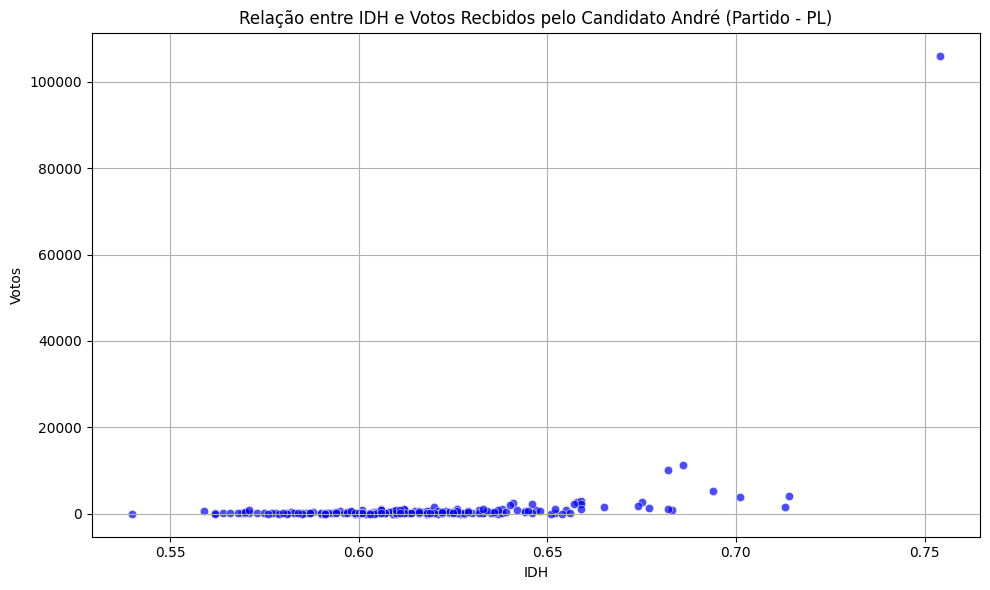

In [496]:
## Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idh', y='total_votos', data=df_aggregated_candidato_andre, color='blue', alpha=0.7)
plt.title('Relação entre IDH e Votos Recbidos pelo Candidato André (Partido - PL)')
plt.xlabel('IDH')
plt.ylabel('Votos')

plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Votos')

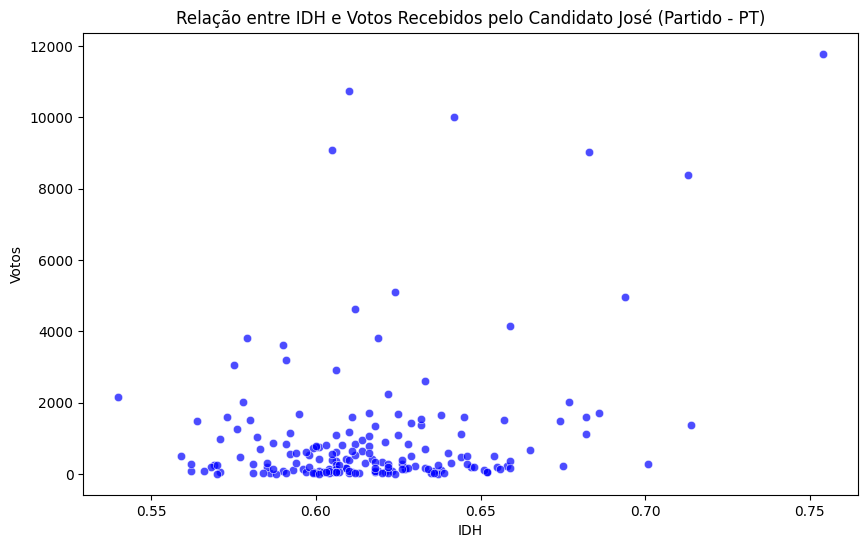

In [497]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idh', y='total_votos', data=df_aggregated_candidato_jose, color='blue', alpha=0.7)
plt.title('Relação entre IDH e Votos Recebidos pelo Candidato José (Partido - PT)')
plt.xlabel('IDH')
plt.ylabel('Votos')

### Correlação com dados de furto

In [498]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
filtro_furtos = df_furtos['ano'] == 2022
df_furtos_por_cidade = df_furtos[filtro_furtos].groupby(['nome_municipio']).size().reset_index(name='total_furtos').sort_values(by='total_furtos', ascending=False)
# Normalize the nome_municipio columns
df_furtos_por_cidade['nome_municipio'] = normalize_names(df_furtos_por_cidade['nome_municipio'])
df_furtos_por_cidade

,nome_municipio,total_furtos
58,FORTALEZA,32476
43,CAUCAIA,2067
98,JUAZEIRO DO NORTE,1881
103,MARACANAU,1475
50,CRATO,1213
...,...,...
0,ABAIARA,5
170,TARRAFAS,4
54,ERERE,3
63,GRANJEIRO,2


In [500]:
df_aggregated_candidato_andre = pd.merge(df_aggregated_candidato_andre, df_furtos_por_cidade, on='nome_municipio')
df_aggregated_candidato_jose = pd.merge(df_aggregated_candidato_jose, df_furtos_por_cidade, on='nome_municipio')

In [501]:
correlation_candidato_andre = df_aggregated_candidato_andre['total_furtos'].corr(df_aggregated_candidato_andre['total_votos'])
correlation_candidato_jose = df_aggregated_candidato_jose['total_furtos'].corr(df_aggregated_candidato_jose['total_votos'])
correlation, p_value = pearsonr(df_aggregated_candidato_andre['total_furtos'], df_aggregated_candidato_andre['total_votos'])
correlation2, p_value2 = pearsonr(df_aggregated_candidato_jose['total_furtos'], df_aggregated_candidato_jose['total_votos'])
print(f"Coeficiente de Correlação: {correlation}")
print(f"p-value: {p_value2:.7f}")

print(f"Coeficiente de Correlação: {correlation2}")
print(f"p-value: {p_value2:.7f}")

Coeficiente de Correlação: 0.9964007249594193
p-value: 0.0000000
Coeficiente de Correlação: 0.44950649050565195
p-value: 0.0000000


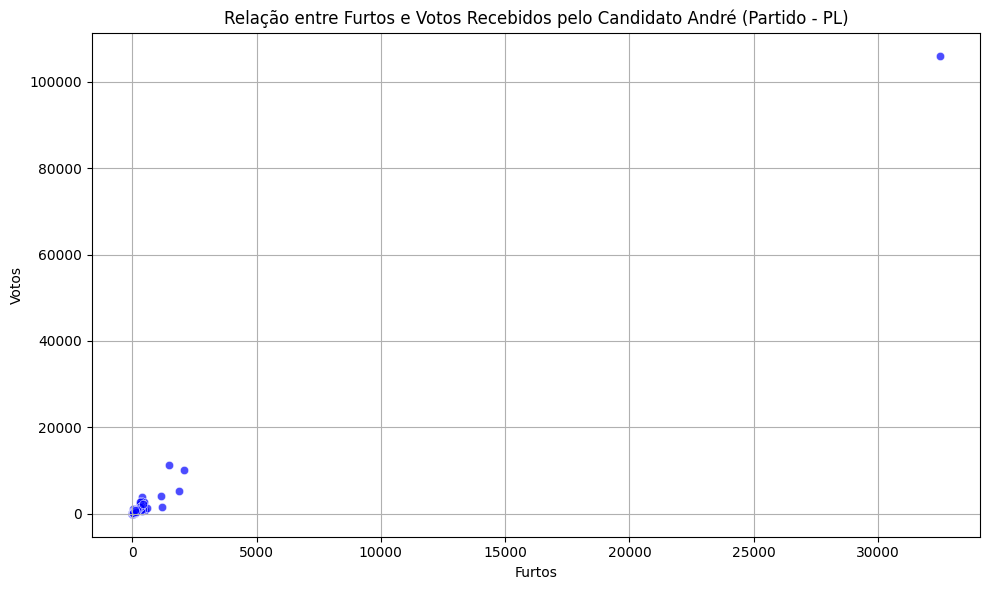

In [502]:
## Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_furtos', y='total_votos', data=df_aggregated_candidato_andre, color='blue', alpha=0.7)
plt.title('Relação entre Furtos e Votos Recebidos pelo Candidato André (Partido - PL)')
plt.xlabel('Furtos')
plt.ylabel('Votos')

plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Votos')

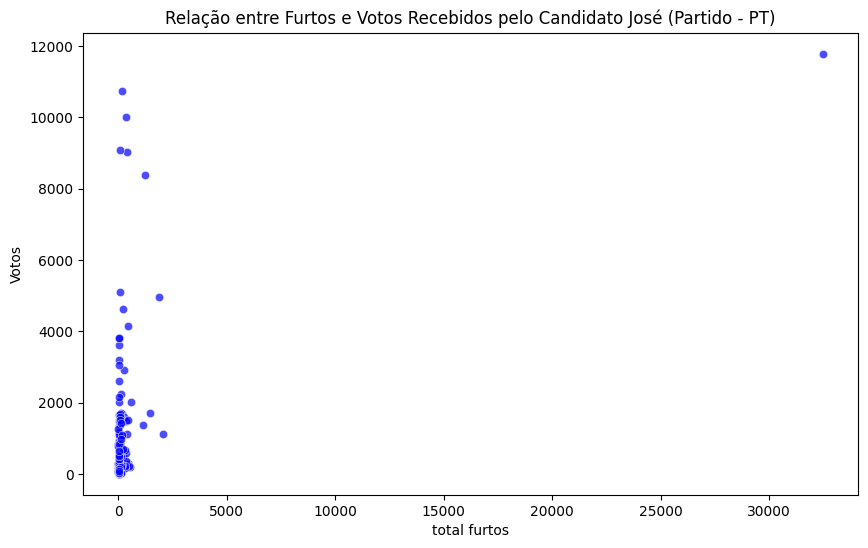

In [503]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_furtos', y='total_votos', data=df_aggregated_candidato_jose, color='blue', alpha=0.7)
plt.title('Relação entre Furtos e Votos Recebidos pelo Candidato José (Partido - PT)')
plt.xlabel('total furtos')
plt.ylabel('Votos')

In [504]:
df_censo_new = df_censo.copy()
df_censo_new['nome_municipio'] = normalize_names(df_censo_new['nome_municipio'])
df_censo_new

,id_regiao,nome_regiao,id_uf,nome_uf,id_municipio,nome_municipio,total_setores,total_pessoas,total_domicilios,total_domicilios_particulares,total_domicilios_coletivos,media_moradores_domicilio_particular_ocupado,percentual_domicilios_particulares_ocupados,total_domicilios_particulares_ocupados
0,2,Nordeste,23,Ceará,2300101,ABAIARA,45,10038,4358,4358,0,"2,868","0,742857143",3500
1,2,Nordeste,23,Ceará,2300150,ACARAPE,42,14027,5447,5446,1,"3,158783784","0,608108108",4440
2,2,Nordeste,23,Ceará,2300200,ACARAU,151,65264,26163,26129,34,"3,108055291","0,471877979",20980
3,2,Nordeste,23,Ceará,2300309,ACOPIARA,112,44962,22529,22523,6,"2,738706334","0,74986283",16403
4,2,Nordeste,23,Ceará,2300408,AIUABA,45,14076,7059,7059,0,"2,854593389",NaN,4931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2,Nordeste,23,Ceará,2313807,URUBURETAMA,40,20189,7969,7958,11,"3,154038431","0,796750508",6401
180,2,Nordeste,23,Ceará,2313906,URUOCA,38,13746,5936,5932,4,"2,945349336","0,150021432",4666
181,2,Nordeste,23,Ceará,2313955,VARJOTA,36,18105,7488,7486,2,"2,956223456","0,032669062",6122
182,2,Nordeste,23,Ceará,2314003,VARZEA ALEGRE,109,38984,17842,17836,6,"2,773286843","0,611968975",14053


In [505]:
df_furtos_por_cidade_censo = df_furtos_por_cidade.merge(df_censo_new, on='nome_municipio')
df_furtos_por_cidade_censo
df_furtos_new = df_furtos_por_cidade.copy()
df_furtos_new['nome_municipio'] = normalize_names(df_furtos_new['nome_municipio'])
df_furtos_new['furtos_por_pessoa'] = df_furtos_por_cidade_censo['total_furtos'] / df_furtos_por_cidade_censo['total_pessoas']
df_furtos_new

,nome_municipio,total_furtos,furtos_por_pessoa
58,FORTALEZA,32476,0.002308
43,CAUCAIA,2067,0.002480
98,JUAZEIRO DO NORTE,1881,0.001511
103,MARACANAU,1475,0.001767
50,CRATO,1213,0.003344
...,...,...,...
0,ABAIARA,5,0.013372
170,TARRAFAS,4,0.000896
54,ERERE,3,0.002918
63,GRANJEIRO,2,0.002366


In [506]:
df_aggregated_candidato_andre = pd.merge(df_aggregated_candidato_andre, df_furtos_new, on='nome_municipio')
df_aggregated_candidato_jose = pd.merge(df_aggregated_candidato_jose, df_furtos_new, on='nome_municipio')

In [507]:
correlation_candidato_andre = df_aggregated_candidato_andre['furtos_por_pessoa'].corr(df_aggregated_candidato_andre['total_votos'])
correlation_candidato_jose = df_aggregated_candidato_jose['furtos_por_pessoa'].corr(df_aggregated_candidato_jose['total_votos'])
correlation, p_value = pearsonr(df_aggregated_candidato_andre['furtos_por_pessoa'], df_aggregated_candidato_andre['total_votos'])
correlation2, p_value2 = pearsonr(df_aggregated_candidato_jose['furtos_por_pessoa'], df_aggregated_candidato_jose['total_votos'])
print(f"Coeficiente de Correlação: {correlation}")
print(f"p-value: {p_value2:.7f}")

print(f"Coeficiente de Correlação: {correlation2}")
print(f"p-value: {p_value2:.7f}")

Coeficiente de Correlação: -0.022199210061991072
p-value: 0.3465380
Coeficiente de Correlação: -0.0699789535169121
p-value: 0.3465380


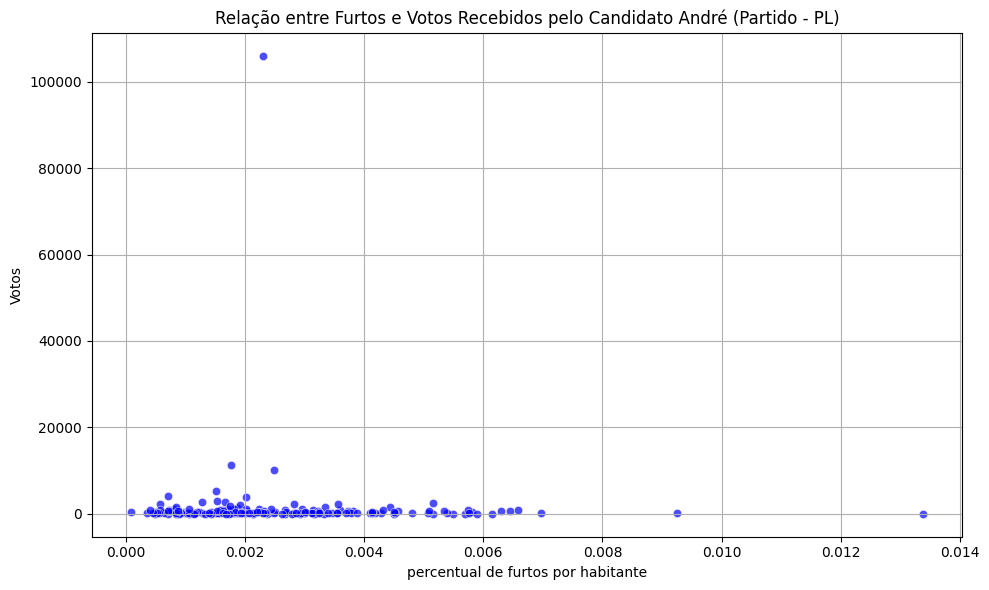

In [508]:
## Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='furtos_por_pessoa', y='total_votos', data=df_aggregated_candidato_andre, color='blue', alpha=0.7)
plt.title('Relação entre Furtos e Votos Recebidos pelo Candidato André (Partido - PL)')
plt.xlabel('percentual de furtos por habitante')
plt.ylabel('Votos')

plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Votos')

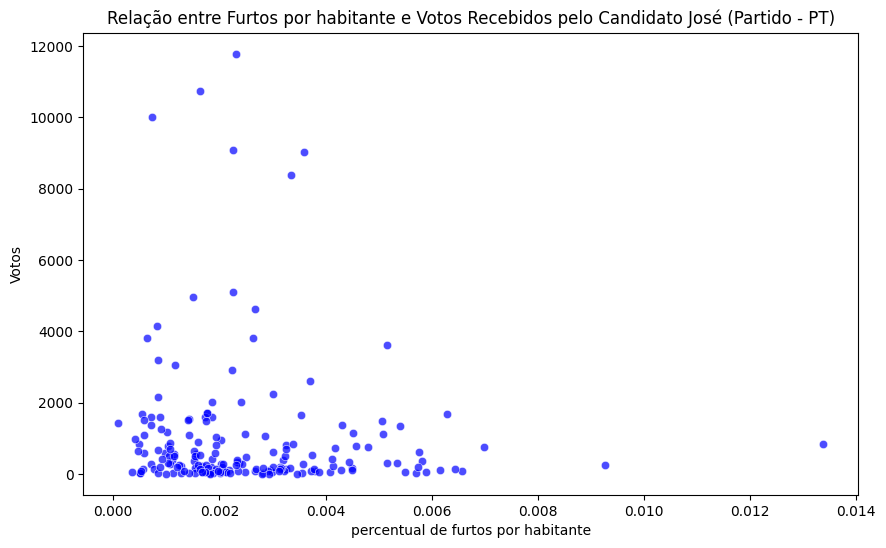

In [509]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='furtos_por_pessoa', y='total_votos', data=df_aggregated_candidato_jose, color='blue', alpha=0.7)
plt.title('Relação entre Furtos por habitante e Votos Recebidos pelo Candidato José (Partido - PT)')
plt.xlabel('percentual de furtos por habitante')
plt.ylabel('Votos')

### Análise extra

<ipython-input-510-35fa1b4e0bc7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_GENERO', y='SQ_CANDIDATO', data=df_genero_candidatos, palette='Set2')


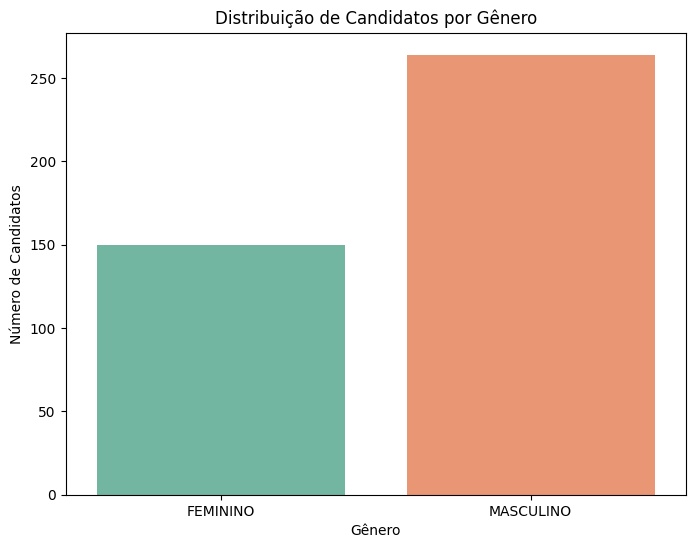

In [510]:
df_genero_candidatos = df_info_candidatos.groupby('DS_GENERO')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='DS_GENERO', y='SQ_CANDIDATO', data=df_genero_candidatos, palette='Set2')
plt.title('Distribuição de Candidatos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Candidatos')
plt.show()

<ipython-input-511-68ddafd81e89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_GRAU_INSTRUCAO', y='SQ_CANDIDATO', data=df_instrucao_candidatos, palette='muted')


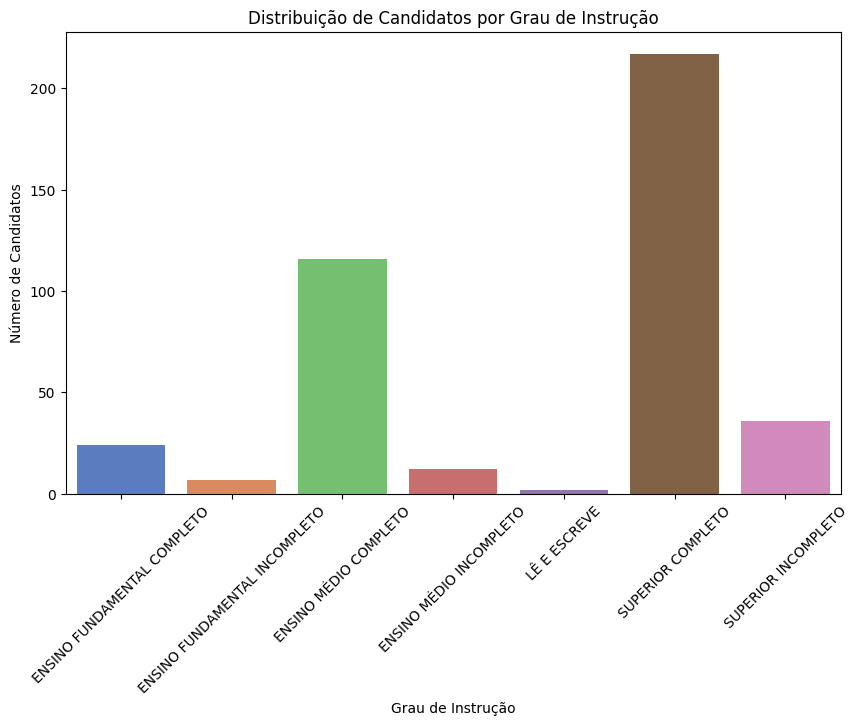

In [511]:
df_instrucao_candidatos = df_info_candidatos.groupby('DS_GRAU_INSTRUCAO')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_GRAU_INSTRUCAO', y='SQ_CANDIDATO', data=df_instrucao_candidatos, palette='muted')
plt.title('Distribuição de Candidatos por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-512-775d794650c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_ESTADO_CIVIL', y='SQ_CANDIDATO', data=df_estado_civil_candidatos, palette='Blues')


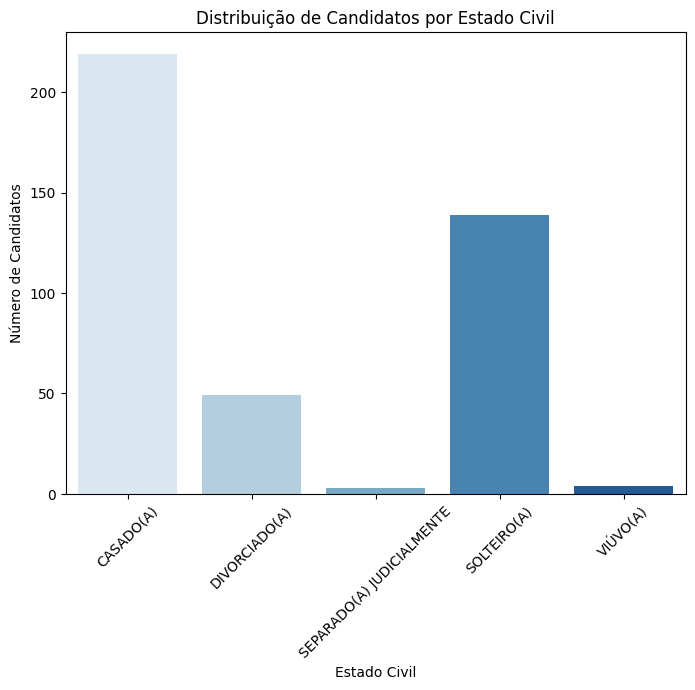

In [512]:
df_estado_civil_candidatos = df_info_candidatos.groupby('DS_ESTADO_CIVIL')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='DS_ESTADO_CIVIL', y='SQ_CANDIDATO', data=df_estado_civil_candidatos, palette='Blues')
plt.title('Distribuição de Candidatos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-513-edee69dffe41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_COR_RACA', y='SQ_CANDIDATO', data=df_cor_raca_candidatos, palette='coolwarm')


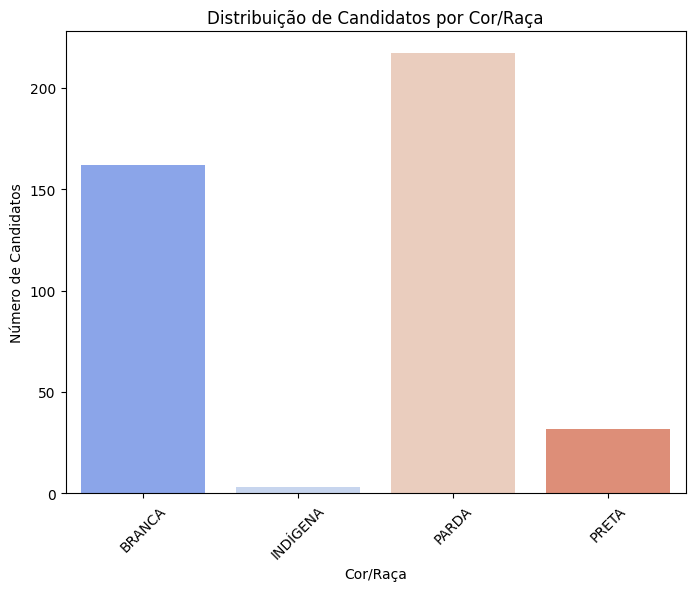

In [513]:
df_cor_raca_candidatos = df_info_candidatos.groupby('DS_COR_RACA')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='DS_COR_RACA', y='SQ_CANDIDATO', data=df_cor_raca_candidatos, palette='coolwarm')
plt.title('Distribuição de Candidatos por Cor/Raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-514-def058648612>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NM_COLIGACAO', y='SQ_CANDIDATO', data=df_coligacao_candidatos.sort_values(by='SQ_CANDIDATO', ascending=False).head(10), palette='Paired')


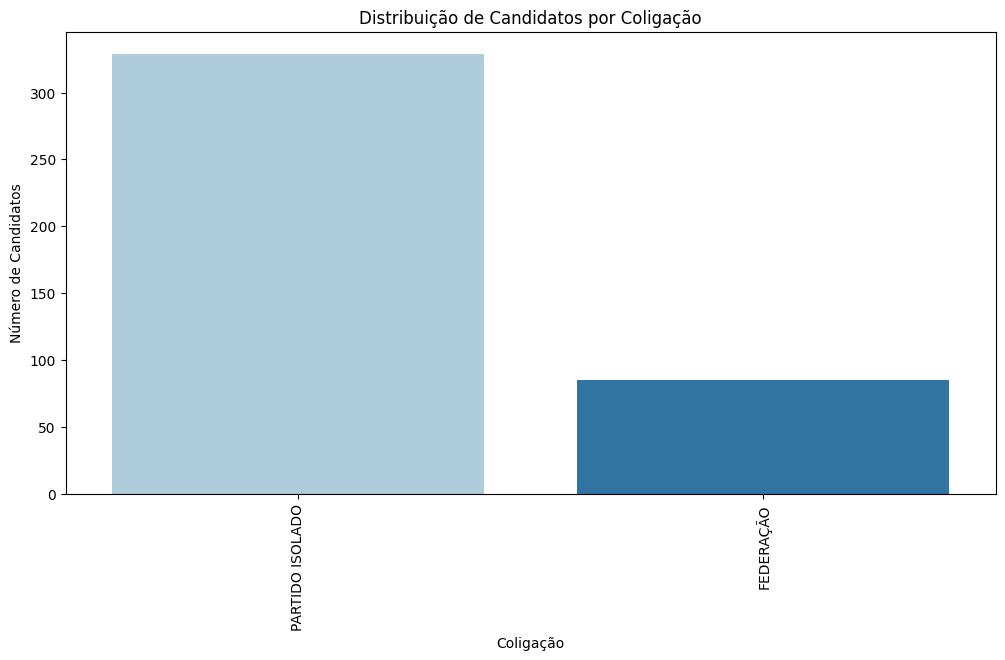

In [514]:
# Contagem de candidatos por coligação
df_coligacao_candidatos = df_info_candidatos.groupby('NM_COLIGACAO')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='NM_COLIGACAO', y='SQ_CANDIDATO', data=df_coligacao_candidatos.sort_values(by='SQ_CANDIDATO', ascending=False).head(10), palette='Paired')
plt.title('Distribuição de Candidatos por Coligação')
plt.xlabel('Coligação')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=90)
plt.show()


<ipython-input-515-ad535e0cd9f9>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_info_candidatos['ANO_NASCIMENTO'] = pd.to_datetime(df_info_candidatos['DT_NASCIMENTO']).dt.year


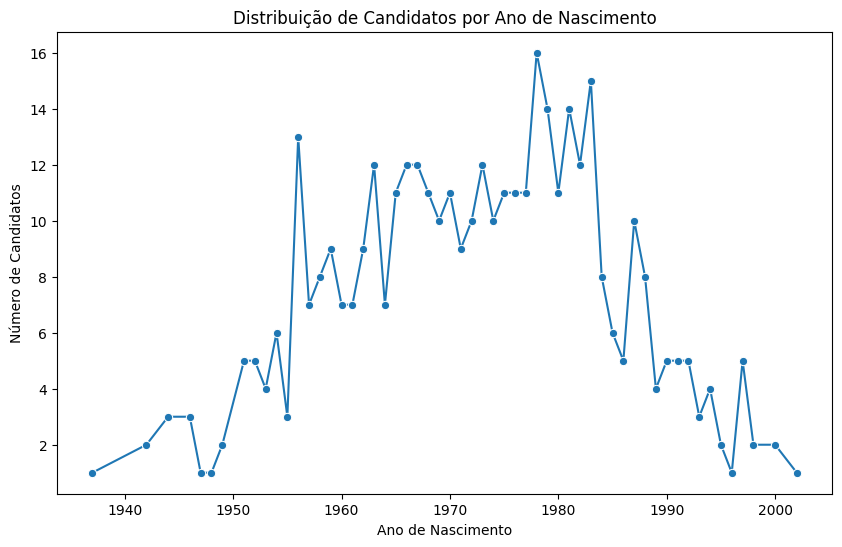

In [515]:
# Adicionando coluna de ano de nascimento
df_info_candidatos['ANO_NASCIMENTO'] = pd.to_datetime(df_info_candidatos['DT_NASCIMENTO']).dt.year

# Contagem de candidatos por ano de nascimento
df_nascimento_candidatos = df_info_candidatos.groupby('ANO_NASCIMENTO')['SQ_CANDIDATO'].count().reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x='ANO_NASCIMENTO', y='SQ_CANDIDATO', data=df_nascimento_candidatos, marker='o')
plt.title('Distribuição de Candidatos por Ano de Nascimento')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Candidatos')
plt.show()
